In [16]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

In [17]:
sov = pd.read_csv('SouvenirSales.csv')

In [18]:
sov.head()

,Date,Sales
0,Jan-95,1664.81
1,Feb-95,2397.53
2,Mar-95,2840.71
3,Apr-95,3547.29
4,May-95,3752.96


In [19]:
len(sov)

84

In [20]:
sov.dtypes

Date      object
Sales    float64
dtype: object

In [21]:
# convert the date information to a datetime object
sov['Date'] = pd.to_datetime(sov.Date, format='%b-%y')

# convert dataframe column to series (name is used to label the data)
sov_ts = pd.Series(sov.Sales.values, index=sov.Date, name='Sales')

# define the time series frequency
sov_ts.index = pd.DatetimeIndex(sov_ts.index, freq=sov_ts.index.inferred_freq)

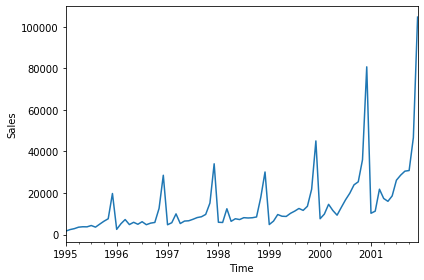

In [22]:
# plot the series
ax = sov_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
plt.tight_layout()
plt.show()

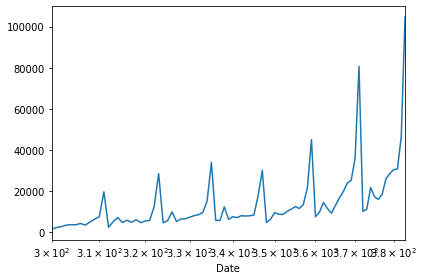

In [23]:
ax = sov_ts.plot()
ax.set_xscale('log')
plt.tight_layout()
plt.show()

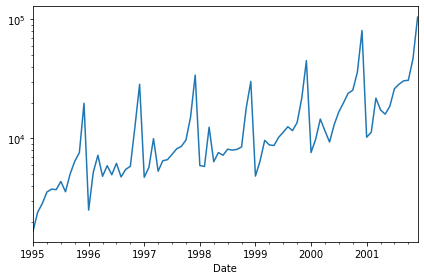

In [24]:
ax = sov_ts.plot()
ax.set_yscale('log')
plt.tight_layout()
plt.show()

Comparing the two time plots, what can be said about the type of trend in the data?

In [25]:
nValid = 12
nTrain = len(sov_ts) - nValid

#partition the data
train_ts = sov_ts[:nTrain]
valid_ts = sov_ts[nTrain:]